In [14]:
import pandas as pd
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [15]:
df = pd.read_csv('Dataset/umist_faces.csv')


In [16]:
df.shape

(575, 10305)

In [17]:
df.head()

label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0    1a    233.0    234.0    234.0    233.0    234.0    232.0    232.0   
1    1a    234.0    234.0    234.0    234.0    233.0    232.0    202.0   
2    1a    234.0    234.0    234.0    234.0    233.0    230.0    225.0   
3    1a    234.0    234.0    234.0    234.0    234.0    234.0    234.0   
4    1a    234.0    234.0    234.0    234.0    234.0    234.0    234.0   

   pixel_7  pixel_8  ...  pixel_10294  pixel_10295  pixel_10296  pixel_10297  \
0    168.0     99.0  ...        157.0        154.0        151.0        147.0   
1     98.0     79.0  ...        158.0        154.0        150.0        147.0   
2    109.0     85.0  ...        180.0        174.0        168.0        164.0   
3    232.0    229.0  ...        174.0        168.0        162.0        157.0   
4    234.0    229.0  ...        186.0        176.0        170.0        164.0   

   pixel_10298  pixel_10299  pixel_10300  pixel_10301  pixel_10302  \
0        143.0        140.0        141.0        141.0        140.0   
1        141.0        140.0        137.0        138.0        137.0   
2        157.0        152.0        151.0        148.0        145.0   
3        155.0        150.0        144.0        144.0        142.0   
4        162.0        157.0        152.0        150.0        148.0   

   pixel_10303  
0        136.0  
1        137.0  
2        145.0  
3        143.0  
4        148.0  

[5 rows x 10305 columns]

In [18]:
X = df.drop('label', axis=1)
y = df['label']

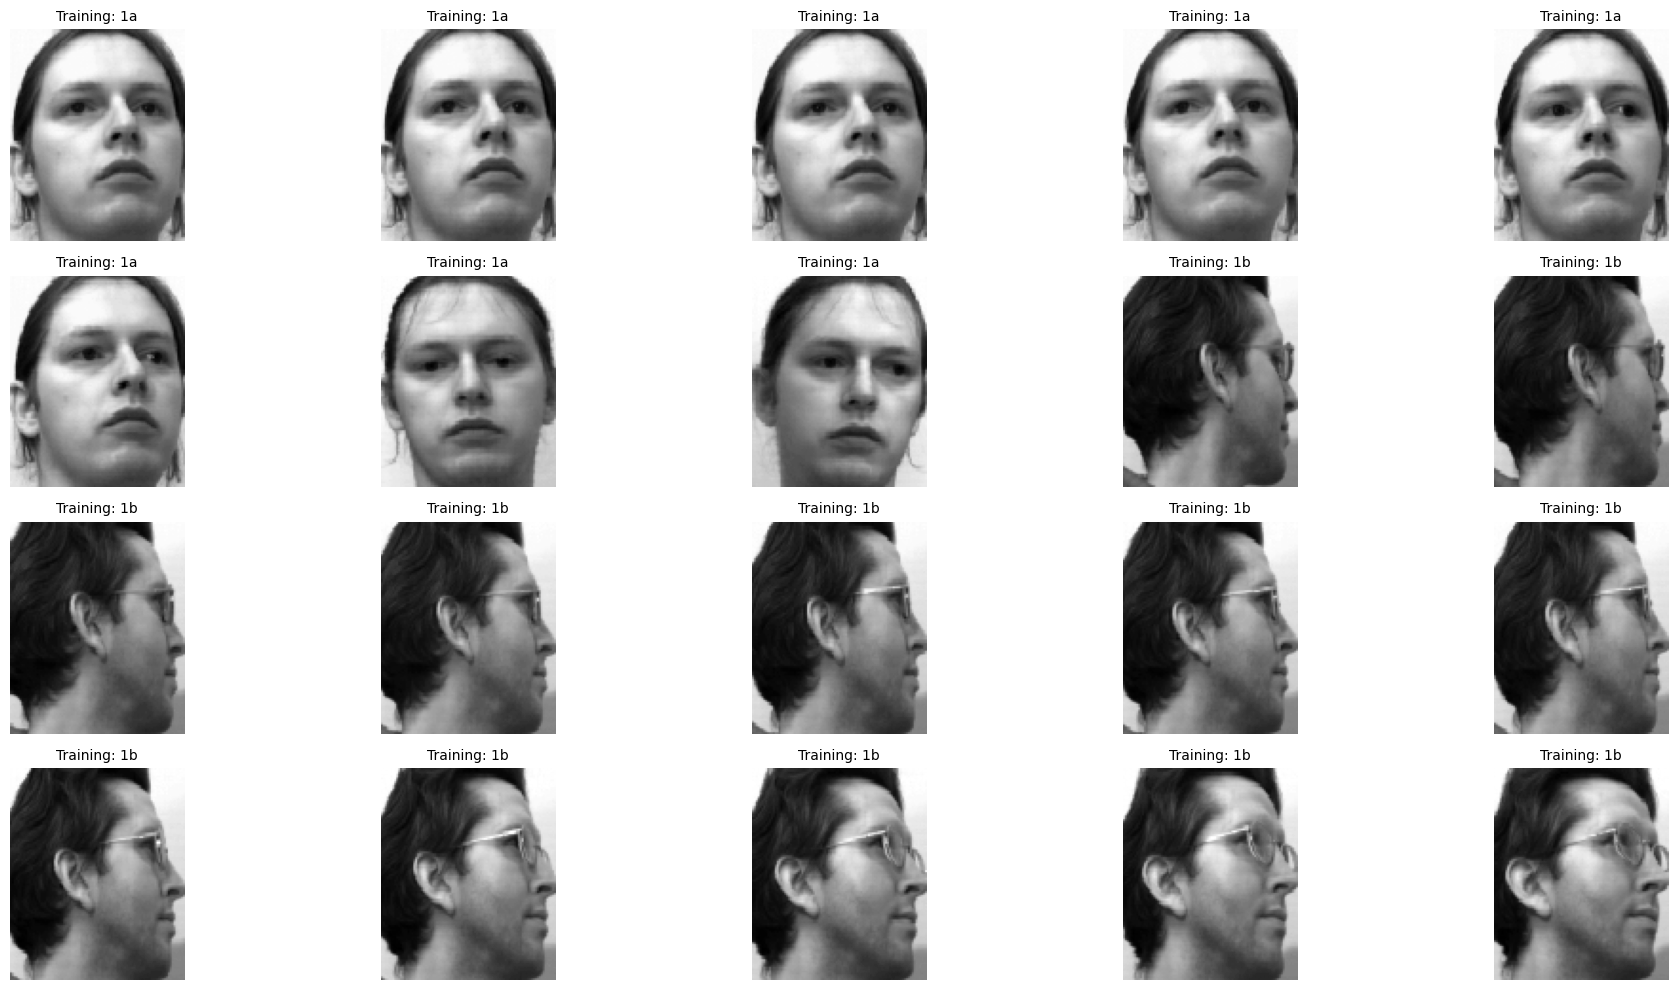

In [19]:
# Check how the data looks like
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))
for index, (image, label) in enumerate(zip(X.iloc[30:50, :].values, y.iloc[30:50].values)):
    plt.subplot(4, 5, index + 1)  # Adjusted to 3 rows and 5 columns
    plt.imshow(np.reshape(image, (112, 92)), cmap=plt.cm.gray)
    plt.title('Training: ' + str(label), fontsize=10)  # Reduced font size for better fit
    plt.axis('off')  # Hide axes for better visualization
plt.tight_layout()  # Adjust subplots to fit into figure area
plt.show()

In [20]:
# Here the y is the label of the image, which is the person's id and label i like 1a, 1b , 1c etc.
# We will convert this to a number for the model to understand
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)



[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11

In [21]:
# Splitting the dataset into the Training set and Test set and Validation set
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y ,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=0)



// Preprocessing Steps

In [22]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)



In [23]:
# Pca for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)



In [25]:
pca.explained_variance_ratio_.sum()

0.9901244368244989

In [24]:
X_train.shape

(345, 223)

In [ ]:
# Find th best number of clusters
from sklearn.cluster import KMeans
# Silhouette score
from sklearn.metrics import silhouette_score

wcss = []
silhouette = []
for i in range(15, 35):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(X_train)
    silhouette.append(silhouette_score(X_train, y_kmeans))
    


plt.plot(range(15, 35), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# Best Silhouette score
best_score = np.argmax(silhouette) +15
print(best_score)

In [28]:
# Try Kmeeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=33, random_state=0)

kmeans.fit(X_train)

y_kmeans = kmeans.predict(X_train)

# Checking the images in clusters

y_kmeans

array([ 5,  2,  8,  7,  6,  7, 14, 15,  6,  7,  5,  8, 14, 17,  9, 17,  7,
        5,  5, 18, 12,  7, 11, 12, 12,  5,  3,  2, 12, 17,  8,  7, 13, 18,
        7, 13,  9, 11, 19, 11,  3,  1,  2,  5, 17, 11, 12,  2, 19, 14,  8,
        7,  5, 16,  9, 14, 13,  2, 14, 16, 19,  7, 13,  5,  8,  7, 19,  3,
        7, 11,  5, 16,  9, 13, 13, 13,  1,  5, 10, 19,  9, 14, 14,  2, 11,
       10,  9, 16,  1,  2,  6,  2, 15,  9, 17,  6, 14,  6,  7,  9,  9, 12,
       11, 14,  2,  0, 12,  5,  8,  9, 18,  9, 14, 16,  2, 14,  4, 10, 12,
        2,  5,  5, 17,  6, 13, 17,  9, 12,  9,  2, 16, 17, 11,  5,  4, 19,
       16, 17,  7, 11,  5,  8,  5, 11,  2, 17,  7, 11,  5, 13,  9, 17,  4,
       19,  6, 16,  0,  8,  9,  6,  1, 17,  3, 13,  5, 18,  9, 14,  1,  7,
        7,  9,  0,  0, 17, 11, 17,  4,  7, 18,  8, 12,  9, 17,  9,  7,  5,
        4,  4, 12,  5,  7, 13,  5,  6, 14, 14, 12, 15,  9, 17,  2,  6, 17,
        5, 15, 14,  7, 12,  5,  9, 14,  7, 19, 13,  3,  3, 16,  8, 17,  9,
       15, 11, 19, 11,  8

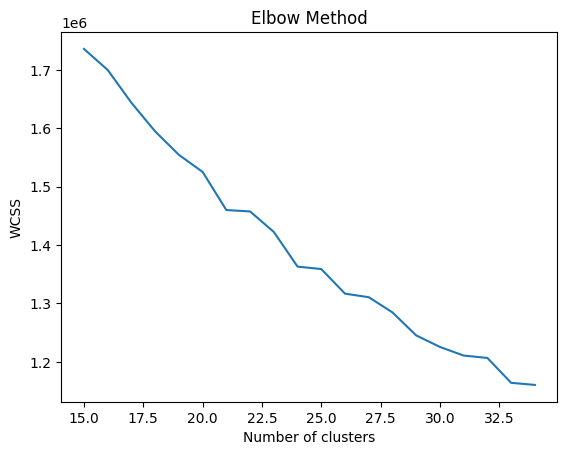

33


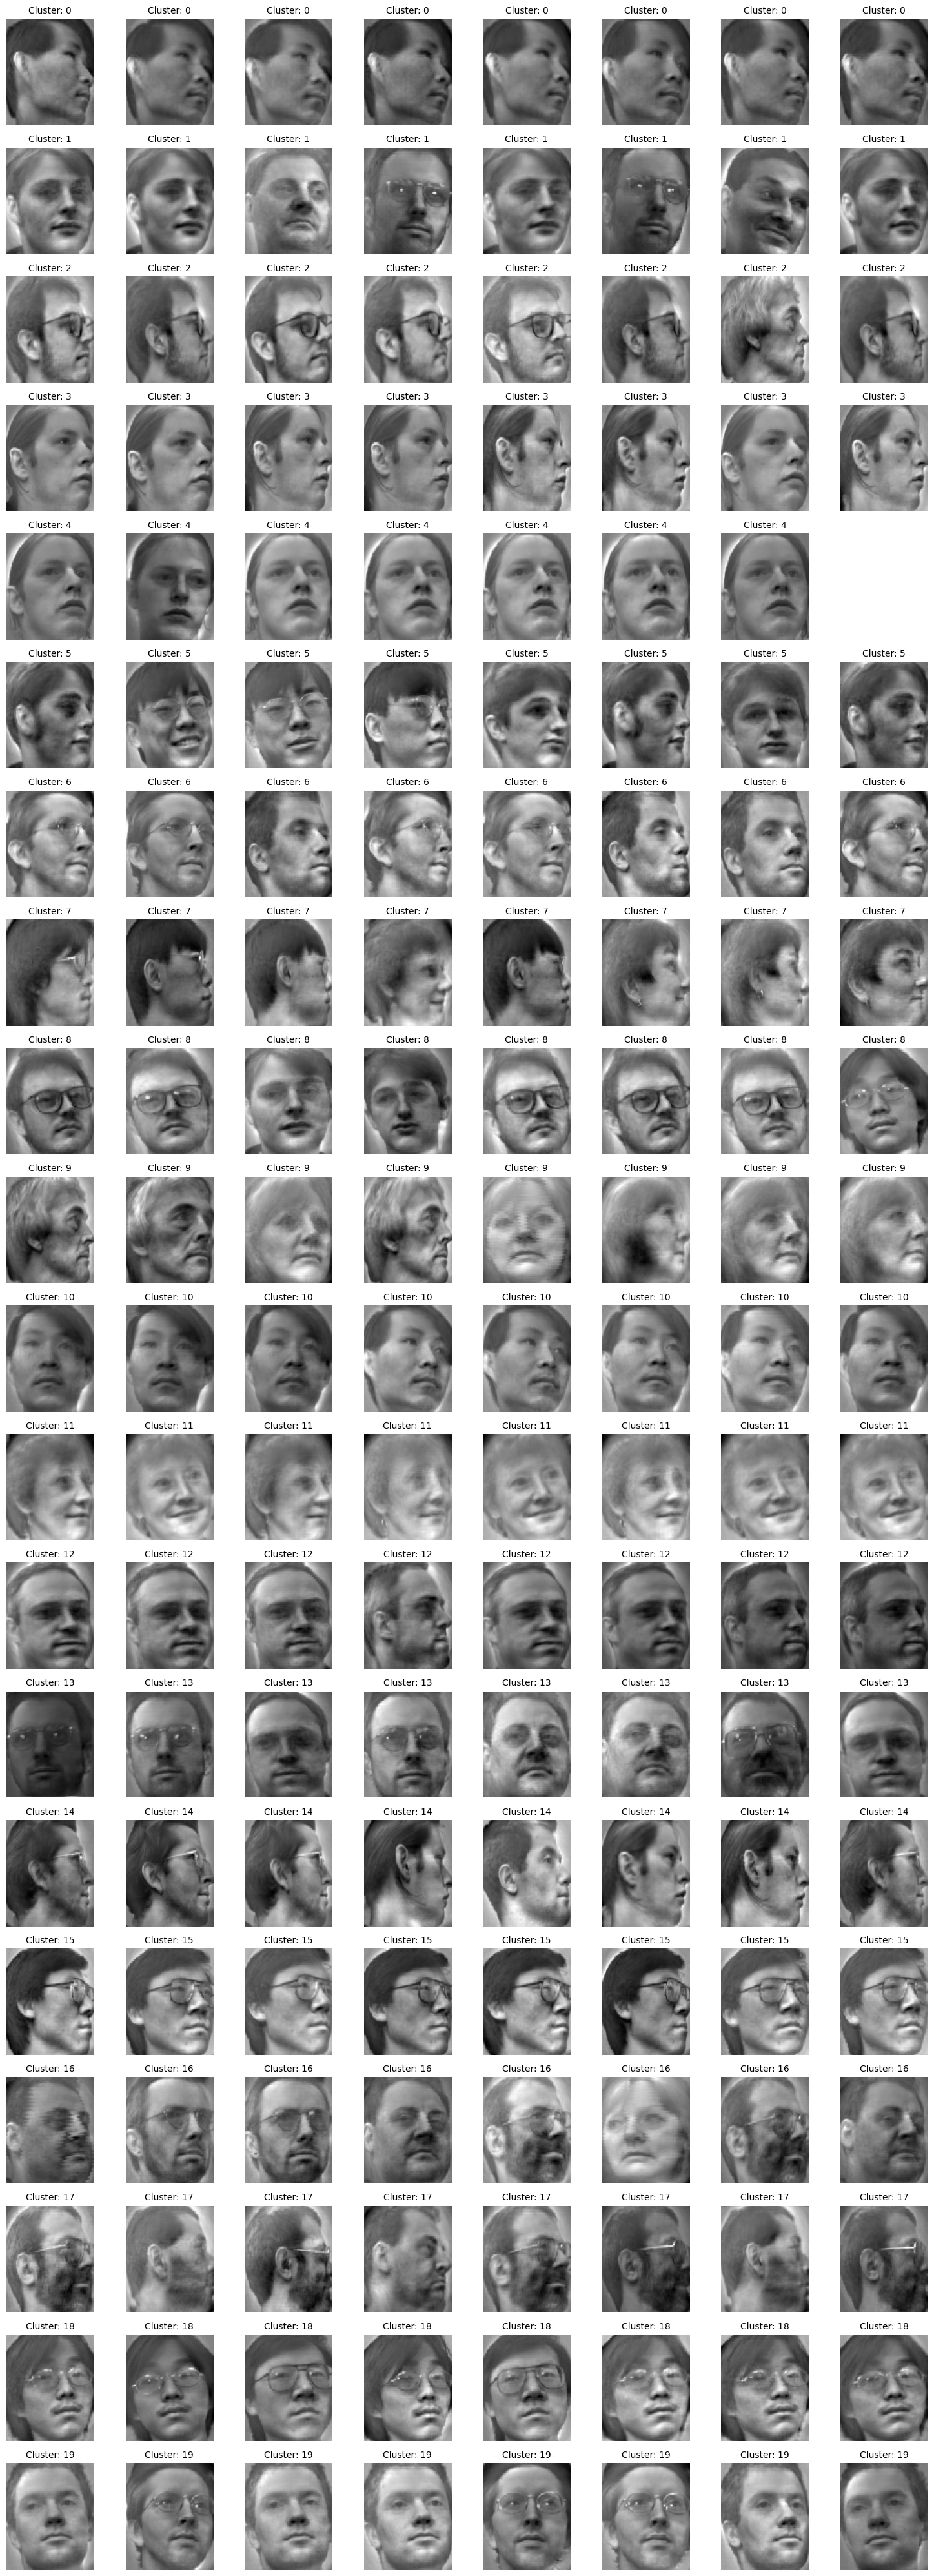

In [38]:
X_train_reconstructed = pca.inverse_transform(X_train)


y_kmeans_unique = np.unique(y_kmeans)
plt.figure(figsize=(15, len(y_kmeans_unique) * 2))  # Adjust the figure size as needed

for i, cluster in enumerate(y_kmeans_unique):
    indices = np.where(y_kmeans == cluster)[0]
    for j, index in enumerate(indices):
        if j >= 8:  # Limit to 8 images per cluster for better visualization
            break
        plt.subplot(len(y_kmeans_unique), 8, i * 8 + j + 1)
        plt.imshow(np.reshape(X_train_reconstructed[index], (112, 92)), cmap=plt.cm.gray)
        plt.title('Cluster: ' + str(cluster), fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()
